In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import tensorflow as tf
from tensorflow import keras

def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    """
    return np.random.choice([0, 1], size=(n, n), p=[prob, 1-prob])



In [2]:
def writing_data(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    mat = []
    vd = np.zeros(samples)
    for ind in range(samples):
        b = grid(n, prob)
        mat.append(cp.copy(b)) #Used copy to not have 2 on the matrix
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    vd[ind] = 1
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
    return np.array(mat),vd

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(11, 11)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#traning data
td,tr = writing_data(1000,11,0.5)

In [5]:
#sample of training data
td[0], tr[0]

(array([[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
        [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]]), 1.0)

In [6]:
#training model
model.fit(td,tr, epochs = 12)

Epoch 1/12
1000/1000 [==============================] - 0s 334us/sample - loss: 0.6680 - acc: 0.6220
Epoch 2/12
1000/1000 [==============================] - 0s 100us/sample - loss: 0.5765 - acc: 0.6980
Epoch 3/12
1000/1000 [==============================] - 0s 89us/sample - loss: 0.5197 - acc: 0.7430
Epoch 4/12
1000/1000 [==============================] - 0s 88us/sample - loss: 0.4641 - acc: 0.8010
Epoch 5/12
1000/1000 [==============================] - 0s 86us/sample - loss: 0.4075 - acc: 0.8380
Epoch 6/12
1000/1000 [==============================] - 0s 79us/sample - loss: 0.3486 - acc: 0.8580
Epoch 7/12
1000/1000 [==============================] - 0s 78us/sample - loss: 0.3082 - acc: 0.8820
Epoch 8/12
1000/1000 [==============================] - 0s 81us/sample - loss: 0.2403 - acc: 0.9190
Epoch 9/12
1000/1000 [==============================] - 0s 81us/sample - loss: 0.1857 - acc: 0.9470
Epoch 10/12
1000/1000 [==============================] - 0s 92us/sample - loss: 0.1321 - acc: 0.97

In [21]:
#test data
test_mat,test_v = writing_data(1000,11,0.6)
#evaluate accuracy
test_loss, test_acc = model.evaluate(test_mat, test_v)
print('Test accuracy:', test_acc)

1000/1000 [==============================] - 0s 38us/sample - loss: 0.4262 - acc: 0.8380
('Test accuracy:', 0.838)


In [29]:
probability = np.linspace(0.,1.,500)
acc = np.zeros(len(probability))
for i,v in enumerate(probability):
    #test data
    test_mat,test_v = writing_data(1000,11,v)
    #evaluate accuracy
    test_loss, test_acc = model.evaluate(test_mat, test_v)
    acc[i] = test_acc

1000/1000 [==============================] - 0s 35us/sample - loss: 0.0058 - acc: 0.9980


1000/1000 [==============================] - 0s 42us/sample - loss: 0.6835 - acc: 0.7460


1000/1000 [==============================] - 0s 47us/sample - loss: 0.7021 - acc: 0.7260


1000/1000 [==============================] - 0s 38us/sample - loss: 0.1297 - acc: 0.9510


1000/1000 [==============================] - 0s 40us/sample - loss: 0.0188 - acc: 0.9980


1000/1000 [==============================] - 0s 36us/sample - loss: 0.1533 - acc: 1.0000


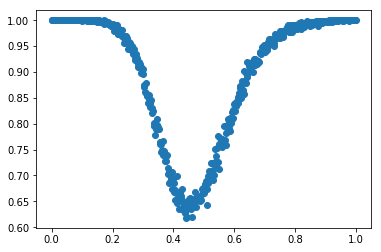

In [30]:
plt.plot(probability,acc, 'o')
plt.show()